In [3]:
import pandas as pd

# Paths to the datasets
training_data_34_66_path = '/data/notebook_files/training_data_34_66.csv'
training_data_10_90_path = '/data/notebook_files/training_data_10_90.csv'
X_test_path = '/data/notebook_files/X_test.csv'
y_test_path = '/data/notebook_files/y_test.csv'

# Loading the datasets
training_data_34_66 = pd.read_csv(training_data_34_66_path)
training_data_10_90 = pd.read_csv(training_data_10_90_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# KNN Computation on the 34:66 Class Distribution

In [4]:
X_train_34_66 = training_data_34_66.drop('Class', axis=1)
y_train_34_66 = training_data_34_66['Class']

y_test = y_test.squeeze()  

Accuracy (34:66): 0.9981742214107651
Recall/Sensitivity (34:66): 0.8673469387755102
Specificity (34:66): 0.9983996904895892
Precision (34:66): 0.48295454545454547
F2 Score (34:66): 0.7482394366197184
Matthews Correlation Coefficient (MCC) (34:66): 0.6464658341544881
Balanced Classification Rate (BCR) (34:66): 0.9328733146325496
ROC AUC (34:66): 0.9383645762750795
Confusion Matrix (34:66):
[[56773    91]
 [   13    85]]
TN (34:66): 56773, FP (34:66): 91, FN (34:66): 13, TP (34:66): 85


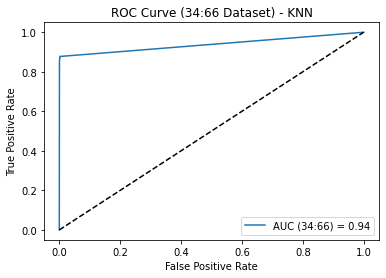

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, fbeta_score, 
                             roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef)
import matplotlib.pyplot as plt

knn_model_34_66 = KNeighborsClassifier(n_neighbors=5)

# Train the model on the 34:66 resampled training data
knn_model_34_66.fit(X_train_34_66, y_train_34_66)

# Predict on the test set
y_pred_34_66_knn = knn_model_34_66.predict(X_test)
y_pred_proba_34_66_knn = knn_model_34_66.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_34_66_knn = accuracy_score(y_test, y_pred_34_66_knn)
recall_34_66_knn = recall_score(y_test, y_pred_34_66_knn)
precision_34_66_knn = precision_score(y_test, y_pred_34_66_knn)
f2_score_34_66_knn = fbeta_score(y_test, y_pred_34_66_knn, beta=2)
roc_auc_34_66_knn = roc_auc_score(y_test, y_pred_proba_34_66_knn)
conf_matrix_34_66_knn = confusion_matrix(y_test, y_pred_34_66_knn)
mcc_34_66_knn = matthews_corrcoef(y_test, y_pred_34_66_knn)

# Extracting TN, FP, FN, TP from confusion matrix
tn_34_66_knn, fp_34_66_knn, fn_34_66_knn, tp_34_66_knn = conf_matrix_34_66_knn.ravel()

# Specificity or True Negative Rate
specificity_34_66_knn = tn_34_66_knn / (tn_34_66_knn + fp_34_66_knn)

# Balanced Classification Rate (BCR) 
bcr_34_66_knn = (recall_34_66_knn + specificity_34_66_knn) / 2

# Print the metrics
print(f'Accuracy (34:66): {accuracy_34_66_knn}')
print(f'Recall/Sensitivity (34:66): {recall_34_66_knn}')
print(f'Specificity (34:66): {specificity_34_66_knn}')
print(f'Precision (34:66): {precision_34_66_knn}')
print(f'F2 Score (34:66): {f2_score_34_66_knn}')
print(f'Matthews Correlation Coefficient (MCC) (34:66): {mcc_34_66_knn}')
print(f'Balanced Classification Rate (BCR) (34:66): {bcr_34_66_knn}')
print(f'ROC AUC (34:66): {roc_auc_34_66_knn}')
print(f'Confusion Matrix (34:66):\n{conf_matrix_34_66_knn}')
print(f'TN (34:66): {tn_34_66_knn}, FP (34:66): {fp_34_66_knn}, FN (34:66): {fn_34_66_knn}, TP (34:66): {tp_34_66_knn}')

# ROC Curve
fpr_34_66_knn, tpr_34_66_knn, _ = roc_curve(y_test, y_pred_proba_34_66_knn)
plt.plot(fpr_34_66_knn, tpr_34_66_knn, label=f'AUC (34:66) = {roc_auc_34_66_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (34:66 Dataset) - KNN')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation of KNN 34:66 Class Distribution

In [7]:
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef

# Initialize the KNN Classifier
knn_model_34_66 = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30)

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3)  # Reduced number of splits

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_34_66_knn = cross_validate(knn_model_34_66, X_train_34_66, y_train_34_66, cv=cv_strategy, scoring=scoring, n_jobs=-1)  # Parallel processing

# Extracting scores
accuracy_scores_34_66_knn = cv_results_34_66_knn['test_accuracy']
recall_scores_34_66_knn = cv_results_34_66_knn['test_recall']
precision_scores_34_66_knn = cv_results_34_66_knn['test_precision']
f2_scores_34_66_knn = cv_results_34_66_knn['test_f2_score']
mcc_scores_34_66_knn = cv_results_34_66_knn['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (34:66 - KNN): {np.mean(accuracy_scores_34_66_knn)} (+/- {np.std(accuracy_scores_34_66_knn)})')
print(f'Cross-validated recall (34:66 - KNN): {np.mean(recall_scores_34_66_knn)} (+/- {np.std(recall_scores_34_66_knn)})')
print(f'Cross-validated precision (34:66 - KNN): {np.mean(precision_scores_34_66_knn)} (+/- {np.std(precision_scores_34_66_knn)})')
print(f'Cross-validated F2 score (34:66 - KNN): {np.mean(f2_scores_34_66_knn)} (+/- {np.std(f2_scores_34_66_knn)})')
print(f'Cross-validated MCC (34:66 - KNN): {np.mean(mcc_scores_34_66_knn)} (+/- {np.std(mcc_scores_34_66_knn)})')

Cross-validated accuracy (34:66 - KNN): 0.9983627642052353 (+/- 0.00011544390473035616)
Cross-validated recall (34:66 - KNN): 1.0 (+/- 0.0)
Cross-validated precision (34:66 - KNN): 0.9935889663655821 (+/- 0.00044918307137435486)
Cross-validated F2 score (34:66 - KNN): 0.9987111503775208 (+/- 9.074521744007636e-05)
Cross-validated MCC (34:66 - KNN): 0.9956952898878564 (+/- 0.0003022511979058571)


# KNN Computation on the 10:90 Class Distribution

In [8]:
X_train_10_90 = training_data_10_90.drop('Class', axis=1)
y_train_10_90 = training_data_10_90['Class']

y_test = y_test.squeeze() 

Accuracy (10:90): 0.9985253326779256
Recall/Sensitivity (10:90): 0.8673469387755102
Specificity (10:90): 0.9987514068655037
Precision (10:90): 0.5448717948717948
F2 Score (10:90): 0.7755474452554744
Matthews Correlation Coefficient (MCC) (10:90): 0.6868146433559101
Balanced Classification Rate (BCR) (10:90): 0.9330491728205069
ROC AUC (10:90): 0.9384682069929828
Confusion Matrix (10:90):
[[56793    71]
 [   13    85]]
TN (10:90): 56793, FP (10:90): 71, FN (10:90): 13, TP (10:90): 85


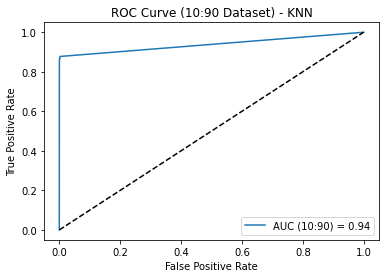

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, fbeta_score, 
                             roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef)
import matplotlib.pyplot as plt

knn_model_10_90 = KNeighborsClassifier(n_neighbors=5)

# Train the model on the 10:90 resampled training data
knn_model_10_90.fit(X_train_10_90, y_train_10_90)

# Predict on the test set
y_pred_10_90_knn = knn_model_10_90.predict(X_test)
y_pred_proba_10_90_knn = knn_model_10_90.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_10_90_knn = accuracy_score(y_test, y_pred_10_90_knn)
recall_10_90_knn = recall_score(y_test, y_pred_10_90_knn)
precision_10_90_knn = precision_score(y_test, y_pred_10_90_knn)
f2_score_10_90_knn = fbeta_score(y_test, y_pred_10_90_knn, beta=2)
roc_auc_10_90_knn = roc_auc_score(y_test, y_pred_proba_10_90_knn)
conf_matrix_10_90_knn = confusion_matrix(y_test, y_pred_10_90_knn)
mcc_10_90_knn = matthews_corrcoef(y_test, y_pred_10_90_knn)

# Extracting TN, FP, FN, TP from confusion matrix
tn_10_90_knn, fp_10_90_knn, fn_10_90_knn, tp_10_90_knn = conf_matrix_10_90_knn.ravel()

# Specificity or True Negative Rate
specificity_10_90_knn = tn_10_90_knn / (tn_10_90_knn + fp_10_90_knn)

# Balanced Classification Rate (BCR)
bcr_10_90_knn = (recall_10_90_knn + specificity_10_90_knn) / 2

# Print the metrics
print(f'Accuracy (10:90): {accuracy_10_90_knn}')
print(f'Recall/Sensitivity (10:90): {recall_10_90_knn}')
print(f'Specificity (10:90): {specificity_10_90_knn}')
print(f'Precision (10:90): {precision_10_90_knn}')
print(f'F2 Score (10:90): {f2_score_10_90_knn}')
print(f'Matthews Correlation Coefficient (MCC) (10:90): {mcc_10_90_knn}')
print(f'Balanced Classification Rate (BCR) (10:90): {bcr_10_90_knn}')
print(f'ROC AUC (10:90): {roc_auc_10_90_knn}')
print(f'Confusion Matrix (10:90):\n{conf_matrix_10_90_knn}')
print(f'TN (10:90): {tn_10_90_knn}, FP (10:90): {fp_10_90_knn}, FN (10:90): {fn_10_90_knn}, TP (10:90): {tp_10_90_knn}')

# ROC Curve
fpr_10_90_knn, tpr_10_90_knn, _ = roc_curve(y_test, y_pred_proba_10_90_knn)
plt.plot(fpr_10_90_knn, tpr_10_90_knn, label=f'AUC (10:90) = {roc_auc_10_90_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (10:90 Dataset) - KNN')
plt.legend(loc='lower right')
plt.show()

In [10]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
import numpy as np

# Initialize the KNN Classifier
knn_model_10_90 = KNeighborsClassifier(n_neighbors=5)

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=3)  # Reduced number of splits for efficiency

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_10_90_knn = cross_validate(knn_model_10_90, X_train_10_90, y_train_10_90, cv=cv_strategy, scoring=scoring, n_jobs=-1)  # Parallel processing

# Extracting scores
accuracy_scores_10_90_knn = cv_results_10_90_knn['test_accuracy']
recall_scores_10_90_knn = cv_results_10_90_knn['test_recall']
precision_scores_10_90_knn = cv_results_10_90_knn['test_precision']
f2_scores_10_90_knn = cv_results_10_90_knn['test_f2_score']
mcc_scores_10_90_knn = cv_results_10_90_knn['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (10:90 - KNN): {np.mean(accuracy_scores_10_90_knn)} (+/- {np.std(accuracy_scores_10_90_knn)})')
print(f'Cross-validated recall (10:90 - KNN): {np.mean(recall_scores_10_90_knn)} (+/- {np.std(recall_scores_10_90_knn)})')
print(f'Cross-validated precision (10:90 - KNN): {np.mean(precision_scores_10_90_knn)} (+/- {np.std(precision_scores_10_90_knn)})')
print(f'Cross-validated F2 score (10:90 - KNN): {np.mean(f2_scores_10_90_knn)} (+/- {np.std(f2_scores_10_90_knn)})')
print(f'Cross-validated MCC (10:90 - KNN): {np.mean(mcc_scores_10_90_knn)} (+/- {np.std(mcc_scores_10_90_knn)})')

Cross-validated accuracy (10:90 - KNN): 0.9983972500649608 (+/- 7.477681347859743e-05)
Cross-validated recall (10:90 - KNN): 0.9997361999592825 (+/- 0.00010771012144313258)
Cross-validated precision (10:90 - KNN): 0.9829260243033723 (+/- 0.0007329492619874523)
Cross-validated F2 score (10:90 - KNN): 0.9963282465006947 (+/- 0.00021153403603569893)
Cross-validated MCC (10:90 - KNN): 0.990420753275945 (+/- 0.00044309023525491916)
